C:\Users\jackparsons210\anaconda3\Lib\site-packages\music21\stream\base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


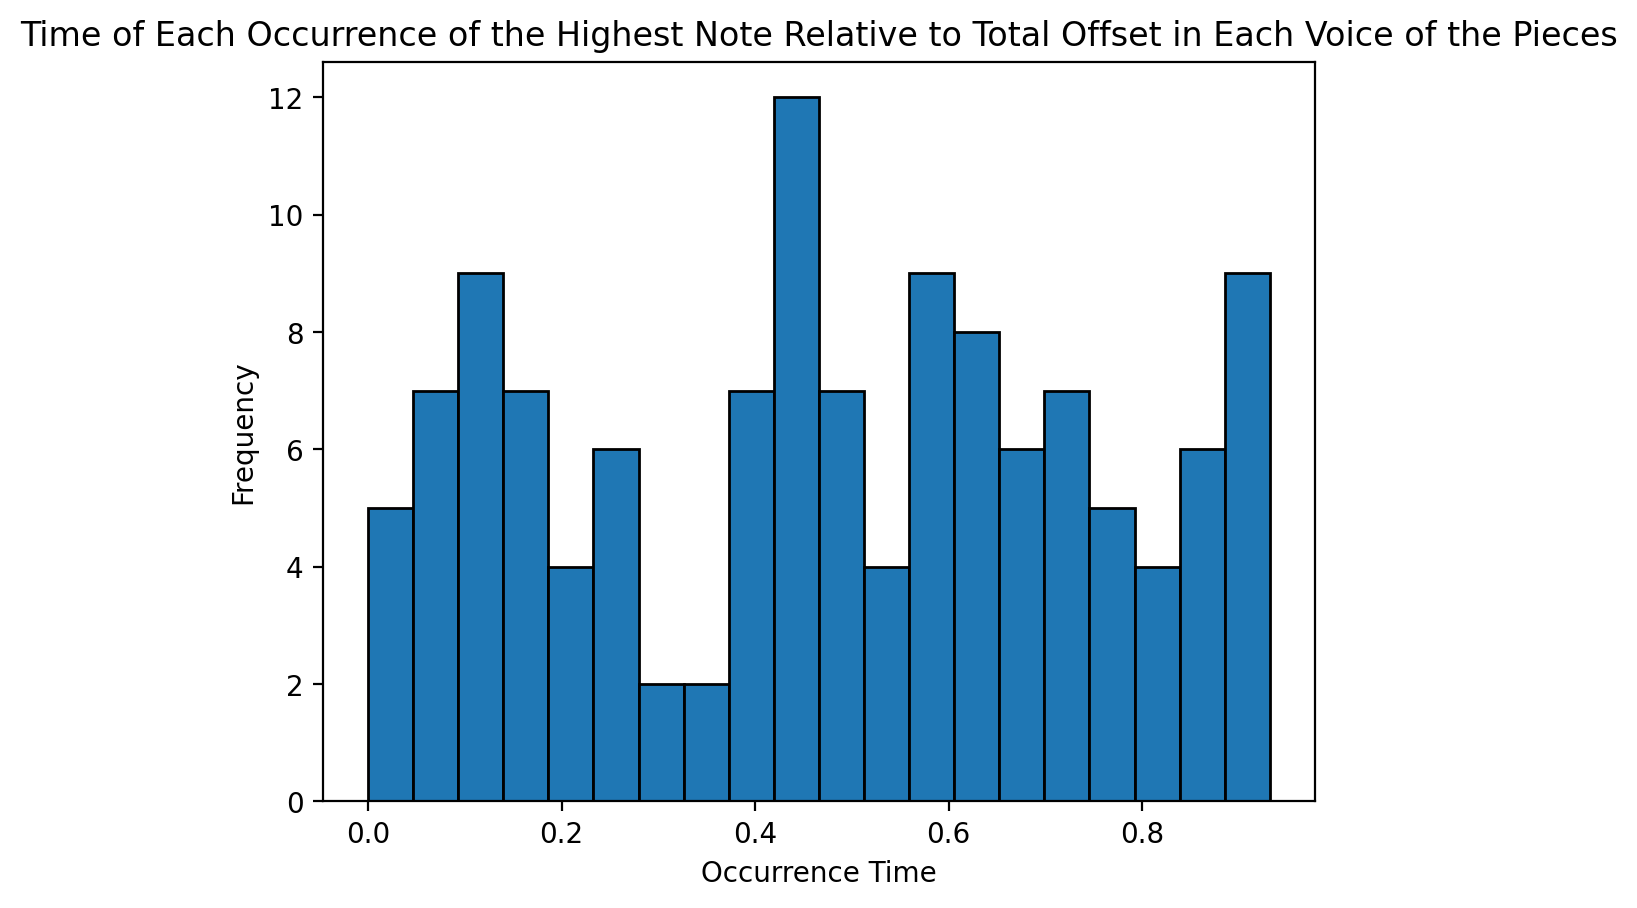

In [1]:
from music21 import corpus
import matplotlib.pyplot as plt

# Initialize a list to store the time of each occurrence of the highest note relative to the total offset of the piece
highest_note_occurrence_times = []

# Initialize a counter for the pieces
piece_counter = 0

# Iterate over all Bach pieces in the music21 corpus
for piece_name in corpus.getComposer('bach'):
    if piece_counter >= 10:
        break # Stop after analyzing the first 100 pieces

    try:
        # Load the score
        score = corpus.parse(piece_name)

        # Iterate over each part (voice) in the score
        for part in score.parts:
            # Retrieve all notes for the current part
            part_notes = list(part.flat.notes)

            # Initialize a variable to store the highest note
            highest_note = None

            # Iterate through the notes to find the highest note
            for note in part_notes:
                if highest_note is None or note.pitch > highest_note.pitch:
                    highest_note = note

            # Get the name of the highest note
            if highest_note is not None:
                highest_note_name = highest_note.pitch.nameWithOctave
                # Calculate the time of each occurrence of the highest note relative to the total offset of the piece
                total_offset = part.duration.quarterLength
                for note in part_notes:
                    if note.pitch == highest_note.pitch:
                        occurrence_time = note.offset / total_offset
                        highest_note_occurrence_times.append(occurrence_time)
            else:
                print(f"No notes found in the part of {piece_name}.")

        piece_counter += 1
    except Exception as e:
        print(f"Error processing {piece_name}: {e}")

# Plot the histogram of the time of each occurrence of the highest note relative to the total offset of the piece
plt.hist(highest_note_occurrence_times, bins=20, edgecolor='black')
plt.title('Time of Each Occurrence of the Highest Note Relative to Total Offset in Each Voice of the Pieces')
plt.xlabel('Occurrence Time')
plt.ylabel('Frequency')
plt.show()


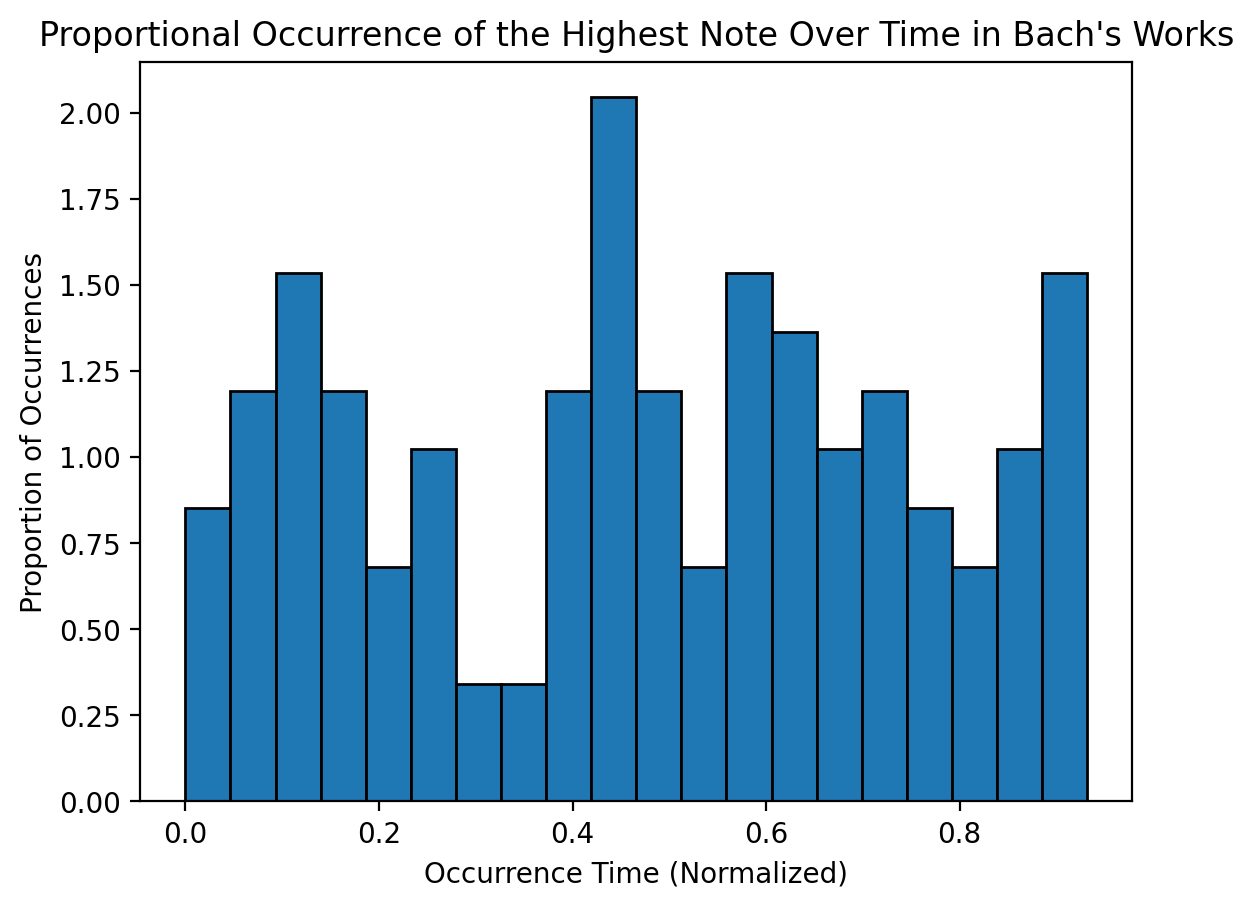

In [2]:
from music21 import corpus
import matplotlib.pyplot as plt

# Initialize a list to store the time of each occurrence of the highest note relative to the total offset of the piece
highest_note_occurrence_times = []

# Initialize a counter for the pieces
piece_counter = 0

# Iterate over all Bach pieces in the music21 corpus
for piece_name in corpus.getComposer('bach'):
    if piece_counter >= 10:
        break # Stop after analyzing the first 10 pieces (updated from 100)

    try:
        # Load the score
        score = corpus.parse(piece_name)

        # Iterate over each part (voice) in the score
        for part in score.parts:
            # Retrieve all notes for the current part
            part_notes = list(part.flat.notes)

            # Initialize a variable to store the highest note
            highest_note = None

            # Iterate through the notes to find the highest note
            for note in part_notes:
                if highest_note is None or note.pitch > highest_note.pitch:
                    highest_note = note

            # Get the name of the highest note
            if highest_note is not None:
                highest_note_name = highest_note.pitch.nameWithOctave
                # Calculate the time of each occurrence of the highest note relative to the total offset of the piece
                total_offset = part.duration.quarterLength
                for note in part_notes:
                    if note.pitch == highest_note.pitch:
                        occurrence_time = note.offset / total_offset
                        highest_note_occurrence_times.append(occurrence_time)
            else:
                print(f"No notes found in the part of {piece_name}.")

        piece_counter += 1
    except Exception as e:
        print(f"Error processing {piece_name}: {e}")

# Plot the histogram of the time of each occurrence of the highest note relative to the total offset of the piece
plt.hist(highest_note_occurrence_times, bins=20, edgecolor='black', density=True)
plt.title('Proportional Occurrence of the Highest Note Over Time in Bach\'s Works')
plt.xlabel('Occurrence Time (Normalized)')
plt.ylabel('Proportion of Occurrences')
plt.show()
